#### Muhammad Nizar_2009106059
#### POSTTEST 6 Kecerdasan Buatan / Artificial Intellegence
### Unsupervised Learning

[Video Game Rating ESRB](https://www.kaggle.com/datasets/imohtn/video-games-rating-by-esrb "Video Game Rating ESRB Dataset")

#### *import berberapa libary dan algoritma/metode*

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### *Membuat dataframe terlebih dahulu*

In [56]:
df = pd.read_csv('Video_games_esrb_rating.csv')

#### *membuat variabel untuk membedakan yang mana x(atribut) dan y(label) untuk menyimpan semua kolom yang ada pada dataframe*

In [57]:
X = df[['alcohol_reference', 'animated_blood', 'blood', 'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference', 'fantasy_violence', 'intense_violence',
    'language', 'lyrics', 'mature_humor', 'mild_blood', 'mild_cartoon_violence', 'mild_fantasy_violence', 'mild_language', 'mild_lyrics', 'mild_suggestive_themes',
    'mild_violence', 'no_descriptors', 'nudity', 'partial_nudity' , 'sexual_content', 'sexual_themes', 'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
    'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol', 'violence']]

#### *menggunakan algoritma K-Means Clustering untuk klasterisasi dan menggunakan sebanyak 6 kelompok*

In [58]:
KMeansCluster = KMeans(n_clusters=6)
KMeansCluster.fit(X)

KMeans(n_clusters=6)

#### *Melihat hasil dari pelabelan*

In [59]:
x_labels = KMeansCluster.labels_
print(x_labels)

[2 4 0 ... 2 0 2]


#### *Evaluasi Hasil dari permodelan yang dicoba diatas*

In [60]:
dfKMeans = pd.DataFrame({'x_labels' : x_labels, 'esrb_rating' : df.esrb_rating})

ct = pd.crosstab(dfKMeans['x_labels'], dfKMeans['esrb_rating'])
print(ct)

esrb_rating    E   ET    M    T
x_labels                       
0              0    0  165  238
1            150   94   28  219
2            266    8    0   28
3              0  255    8  112
4              0   46    0   42
5              0    0  186   50


#### Visualisasi Hasil Klusterisasi menggunakan algoritma K-Means
- terjadi pembengkokkan garis yang lumayan tajam pada kluster keempat

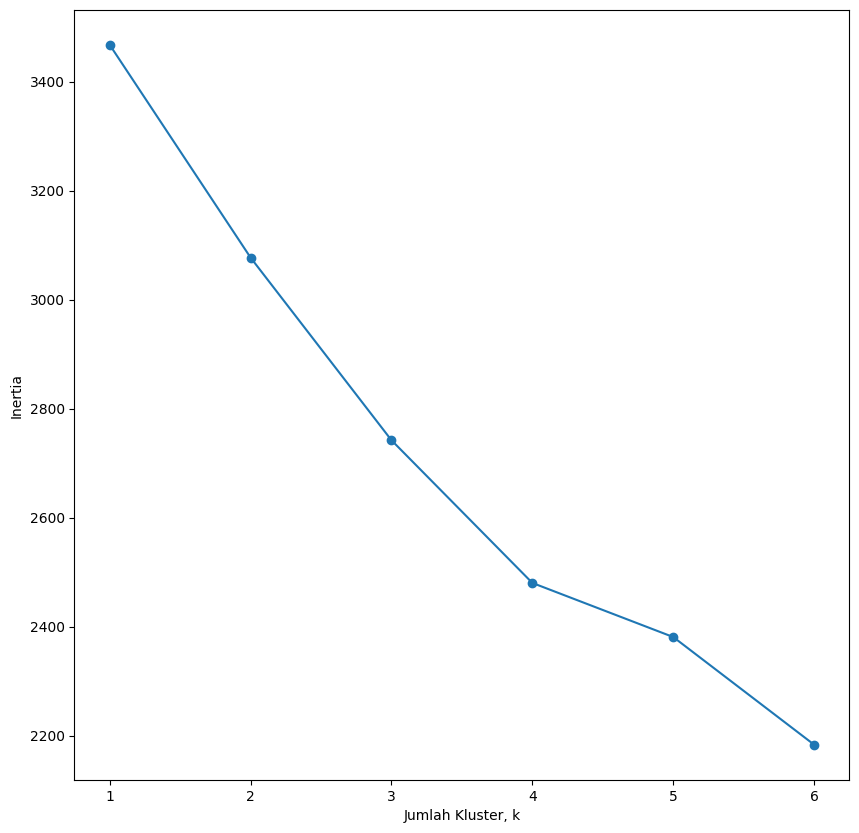

In [61]:
ks = range(1, 7)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Kluster, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()
